<a href="https://colab.research.google.com/github/mirzarenardi01/Basic-Phyton-Programming-for-Data-Science/blob/main/PENGGANTI_UAS_PROYEK_MIRZA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assalamualaikum Warahmatullaahi Wabarakaatuh**
# Tugas Pengganti UAS Proyek Pemodelan dan Komputasi
## Nama : Mirza Yuniar Renardi
## NIM  : 1800015063

# **Data Preparation**

In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd                           
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from scipy.stats import mode
from numpy.random import randint
from sklearn import preprocessing
%matplotlib inline

# **Menginput Dataset**

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/mirzarenardi01/Basic-Phyton-Programming-for-Data-Science/main/covid_19_indonesia_time_series_all.csv')
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Name,Item,Kind,Hidden
0,1/8/2020,ID-JI,Jawa Timur,9,3,1,5,9,5,10,-6,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.22,0.22,0.07,0.12,55.56%,111.11%,NaN,NaN,NaN,NaN,NaN,NaN
1,1/9/2020,ID-JI,Jawa Timur,0,1,23,-24,9,6,33,-30,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.15,66.67%,366.67%,0.0,0.33,NaN,NaN,NaN,NaN
2,1/10/2020,ID-JI,Jawa Timur,0,1,14,-15,9,7,47,-45,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.02,0.17,77.78%,522.22%,1.0,1.00,NaN,NaN,NaN,NaN
3,1/11/2020,ID-JI,Jawa Timur,0,3,8,-11,9,10,55,-56,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.25,111.11%,611.11%,1.0,3.00,NaN,NaN,NaN,NaN
4,1/12/2020,ID-JI,Jawa Timur,0,3,1,-4,9,13,56,-60,Province,NaN,Jawa Timur,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.00,0.22,0.07,0.32,144.44%,622.22%,1.0,1.00,NaN,NaN,NaN,NaN


# **Visualisasi Data**

## Memilih Warna

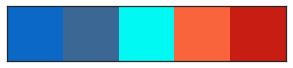

In [3]:
colors=['#0C68C7','#3A6794','#00FAF3','#FA643C','#C71D12']
sns.set(palette=colors, style='white')

sns.palplot(colors)

In [4]:
# Mengubah kolom 'Date' menjadi tipe waktu/tanggal
data["Date"] = pd.to_datetime(data["Date"])

## Diagram Batang Top 10 Kasus Covid 19 Per Provinsi

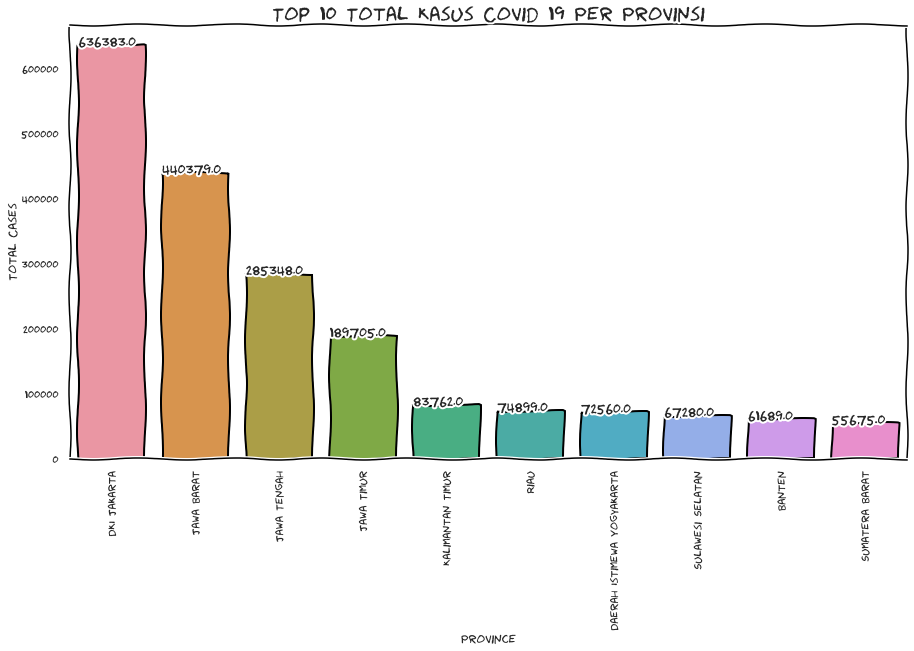

In [5]:
top_10=data.groupby(by='Province').max()[['Total Cases']].sort_values(by=['Total Cases'],ascending=False).reset_index()
with plt.xkcd():
    fig=plt.figure(figsize=(15,8))
    plt.title("Top 10 Total Kasus Covid 19 Per Provinsi", size=20)
    ax=sns.barplot(data=top_10.iloc[:10],y='Total Cases',x='Province', linewidth=2, edgecolor='black')
    ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=90)
    for i in ax.patches:
        ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())

## Persentase Total Kasus Covid 19 Per Pulau

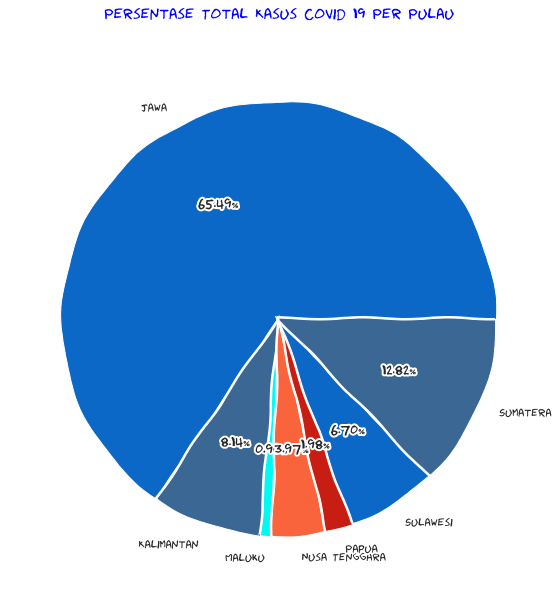

In [6]:
bagan = data.groupby('Island')['Total Cases'].sum().reset_index()
with plt.xkcd():
    fig=plt.figure(figsize=(10,10))
    plt.pie(bagan['Total Cases'], labels = bagan['Island'], autopct='%1.2f%%')
    plt.title('Persentase Total Kasus Covid 19 Per Pulau', loc='center',pad=30, fontsize=15, color='blue')

## Grafik Kasus Total Kasus Covid 19

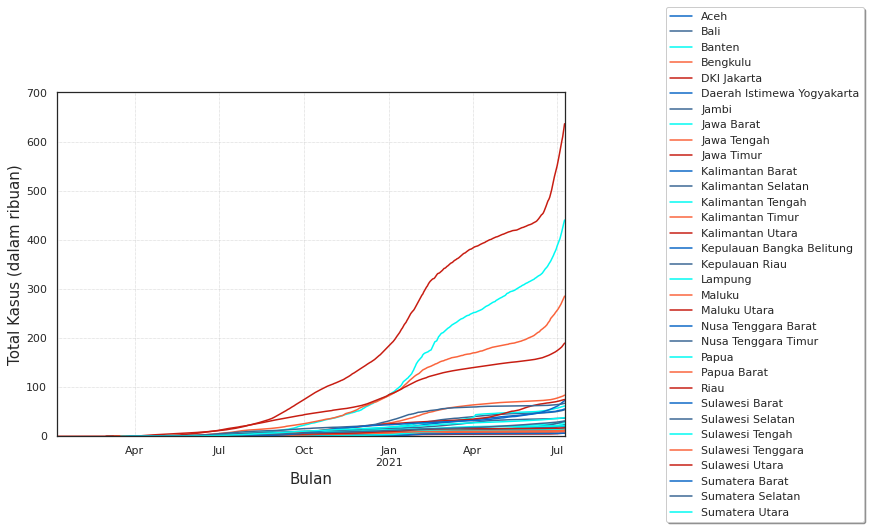

In [10]:
import matplotlib.pyplot as plt
data.groupby(['Date','Province'])['Total Cases'].sum().unstack().plot()
plt.title('',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Bulan', fontsize = 15)
plt.ylabel('Total Kasus (dalam ribuan)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype(int))
#Menambah Legend
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=1)
plt.gcf().set_size_inches(15, 7)
plt.tight_layout()
plt.show()

## Grafik Total Kasus Covid 19 di Jawa Barat

Text(0, 0.5, 'Kasus Terkonfirmasi')

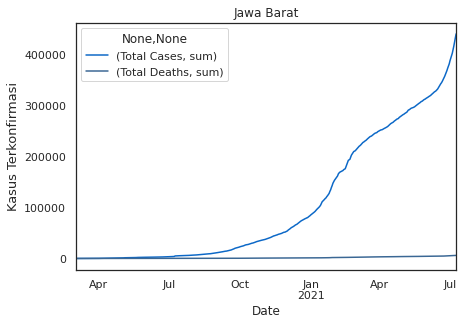

In [11]:
kasus_jb= data[data['Province']=='Jawa Barat'].groupby(['Date']).agg({'Total Cases':['sum']})
kasus_jb_meninggal = data[data['Province']=='Jawa Barat'].groupby(['Date']).agg({'Total Deaths':['sum']})
total_jb = kasus_jb.join(kasus_jb_meninggal)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_jb.plot(ax=plt.gca(), title='Jawa Barat')
plt.ylabel("Kasus Terkonfirmasi", size=13)

# **Exploratory Data Analysis (EDA)**

### *Mengecek Dimensi Data*

In [12]:
data.shape

(16283, 41)

### *Mengecek Variabel Dataset*

In [13]:
data.columns.values

array(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths',
       'Name', 'Item', 'Kind', 'Hidden'], dtype=object)

Terdapat 41 Kolom/Variabel

### *Melihat Tipe Data pada Variabel*

In [14]:
data.dtypes

Date                           datetime64[ns]
Location ISO Code                      object
Location                               object
New Cases                               int64
New Deaths                              int64
New Recovered                           int64
New Active Cases                        int64
Total Cases                             int64
Total Deaths                            int64
Total Recovered                         int64
Total Active Cases                      int64
Location Level                         object
City or Regency                       float64
Province                               object
Country                                object
Continent                              object
Island                                 object
Time Zone                              object
Special Status                         object
Total Regencies                         int64
Total Cities                          float64
Total Districts                   

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         16283 non-null  datetime64[ns]
 1   Location ISO Code            16283 non-null  object        
 2   Location                     16283 non-null  object        
 3   New Cases                    16283 non-null  int64         
 4   New Deaths                   16283 non-null  int64         
 5   New Recovered                16283 non-null  int64         
 6   New Active Cases             16283 non-null  int64         
 7   Total Cases                  16283 non-null  int64         
 8   Total Deaths                 16283 non-null  int64         
 9   Total Recovered              16283 non-null  int64         
 10  Total Active Cases           16283 non-null  int64         
 11  Location Level               16283 non-nu

### *Melihat Statistik Data*

In [16]:
data.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Growth Factor of New Cases,Growth Factor of New Deaths,Name,Item,Kind,Hidden
count,16283.000000,16283.000000,16283.000000,16283.000000,1.628300e+04,16283.000000,1.628300e+04,16283.000000,0.0,16283.000000,15814.000000,16283.000000,15812.000000,15787.000000,1.628300e+04,1.628300e+04,16283.000000,16283.000000,16283.000000,16283.000000,16283.000000,16283.000000,16283.000000,15298.000000,14344.000000,0.0,0.0,0.0,0.0
mean,301.271879,7.919364,248.015783,45.336732,4.274674e+04,1243.917644,3.689427e+04,4608.549714,NaN,24.792913,6.049576,432.595283,524.458133,4631.859821,1.140775e+05,1.605704e+07,768.308731,113.427502,-2.850093,20.673622,2977.160052,0.463346,72.462398,1.437652,1.084872,NaN,NaN,NaN,NaN
std,1330.028199,32.171434,997.784905,550.203700,1.784936e+05,4944.634529,1.580017e+05,17670.075450,NaN,69.658831,16.701237,1215.579638,1448.924063,12826.417106,3.247192e+05,4.546363e+07,2784.573161,9.860245,3.618674,45.319811,4987.373956,1.096785,99.203343,3.388187,1.949005,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,-8381.000000,1.000000e+00,0.000000,0.000000e+00,-2395.000000,NaN,1.000000,1.000000,44.000000,35.000000,275.000000,6.640000e+02,6.484070e+05,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,6.000000,0.000000,2.000000,-7.000000,7.265000e+02,23.000000,3.860000e+02,162.500000,NaN,8.000000,1.000000,116.000000,110.000000,995.000000,1.857200e+04,2.570289e+06,47.790000,106.109004,-6.204699,1.645000,166.695000,0.000000,4.980000,0.640000,0.670000,NaN,NaN,NaN,NaN
50%,39.000000,1.000000,24.000000,2.000000,5.941000e+03,149.000000,4.484000e+03,851.000000,NaN,12.000000,2.000000,171.000000,175.000000,1591.000000,4.671700e+04,4.340348e+06,103.840000,112.732941,-2.993595,7.670000,1398.640000,0.110000,41.380000,1.000000,1.000000,NaN,NaN,NaN,NaN
75%,127.000000,4.000000,106.000000,32.000000,1.777450e+04,556.000000,1.430450e+04,2271.000000,NaN,18.000000,4.000000,289.000000,332.000000,2853.000000,7.546800e+04,9.095591e+06,262.700000,120.162056,-0.086475,21.870000,3817.535000,0.550000,93.520000,1.330000,1.000000,NaN,NaN,NaN,NaN
max,38391.000000,1040.000000,28975.000000,18504.000000,2.455912e+06,64631.000000,2.023548e+06,367733.000000,NaN,416.000000,98.000000,7230.000000,8488.000000,74953.000000,1.916907e+06,2.651855e+08,16334.310000,138.696030,4.225615,1208.910000,58673.660000,63.800000,854.680000,175.000000,134.500000,NaN,NaN,NaN,NaN


### *Mengecek Missing Data*

In [17]:
data.isnull().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                16283
Province                         495
Country                            0
Continent                          0
Island                           495
Time Zone                        495
Special Status                 13890
Total Regencies                    0
Total Cities                     469
Total Districts                    0
Total Urban Villages             471
Total Rural Villages             496
Area (km2)                         0
Population                         0
Population Density                 0
L

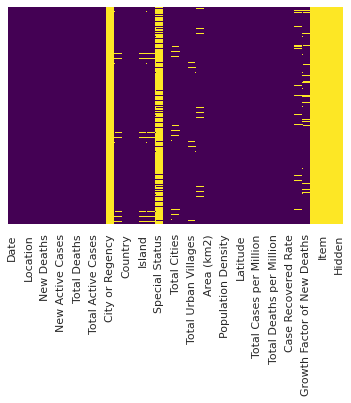

In [18]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

### *Menghapus kolom data yang tidak diperlukan*

In [19]:
data.drop('Location',inplace=True,axis=1)
data.drop('Location ISO Code',inplace=True,axis=1)
data.drop('Location Level',inplace=True,axis=1)
data.drop('City or Regency',inplace=True,axis=1)
data.drop('Country',inplace=True,axis=1)
data.drop('Continent',inplace=True,axis=1)
data.drop('Island',inplace=True,axis=1)
data.drop('Time Zone',inplace=True,axis=1)
data.drop('Special Status',inplace=True,axis=1)
data.drop('Total Regencies',inplace=True,axis=1)
data.drop('Total Cities',inplace=True,axis=1)
data.drop('Total Districts',inplace=True,axis=1)
data.drop('Total Urban Villages',inplace=True,axis=1)
data.drop('Total Rural Villages',inplace=True,axis=1)
data.drop('Area (km2)',inplace=True,axis=1)
data.drop('Population',inplace=True,axis=1)
data.drop('Population Density',inplace=True,axis=1)
data.drop('Longitude',inplace=True,axis=1)
data.drop('Latitude',inplace=True,axis=1)
data.drop('New Cases per Million',inplace=True,axis=1)
data.drop('Total Cases per Million',inplace=True,axis=1)
data.drop('New Deaths per Million',inplace=True,axis=1)
data.drop('Total Deaths per Million',inplace=True,axis=1)
data.drop('Case Fatality Rate',inplace=True,axis=1)
data.drop('Case Recovered Rate',inplace=True,axis=1)
data.drop('Growth Factor of New Cases',inplace=True,axis=1)
data.drop('Growth Factor of New Deaths',inplace=True,axis=1)
data.drop('Name',inplace=True,axis=1)
data.drop('Item',inplace=True,axis=1)
data.drop('Kind',inplace=True,axis=1)
data.drop('Hidden',inplace=True,axis=1)

### *Mengisi NAN*
Dengan menggunakan fillna : ```ffill``` yaitu kita menggunakan nilai pada kolom sebelumnya sebagai nilai kolom setelahnya, ```bfill``` yaitu kita menggunakan nilai setelahnya sebagai nilai kolomm sebelumnya

In [20]:
#data.fillna(df.mean(),axis='columns')
data=data.fillna(method='bfill')
data=data.fillna(method='ffill')
data

,Date,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Province
0,2020-01-08,9,3,1,5,9,5,10,-6,Jawa Timur
1,2020-01-09,0,1,23,-24,9,6,33,-30,Jawa Timur
2,2020-01-10,0,1,14,-15,9,7,47,-45,Jawa Timur
3,2020-01-11,0,3,8,-11,9,10,55,-56,Jawa Timur
4,2020-01-12,0,3,1,-4,9,13,56,-60,Jawa Timur
...,...,...,...,...,...,...,...,...,...,...
16278,2021-07-09,124,1,3,120,12447,252,10412,1783,Sulawesi Tenggara
16279,2021-07-09,278,9,9,260,17424,572,15525,1327,Sulawesi Utara
16280,2021-07-09,718,10,275,433,55675,1259,48840,5576,Sumatera Barat
16281,2021-07-09,341,6,221,114,31147,1569,27088,2490,Sumatera Selatan


In [21]:
data.isnull().sum()

Date                  0
New Cases             0
New Deaths            0
New Recovered         0
New Active Cases      0
Total Cases           0
Total Deaths          0
Total Recovered       0
Total Active Cases    0
Province              0
dtype: int64

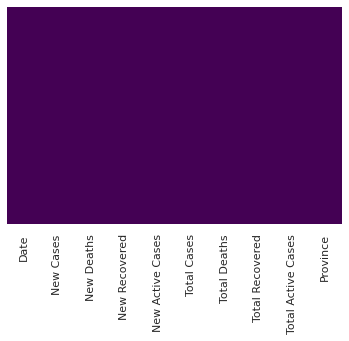

In [22]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

dapat dilihhat bahwa sudah tidak ada data yang hilang

## *Mengecek Outlier*

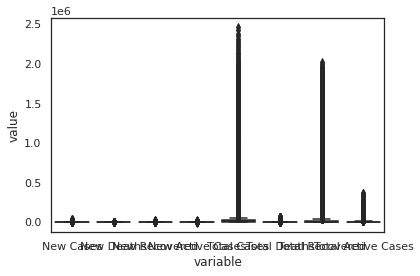

In [23]:
df1=data.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))
plt.tight_layout()

Terlihat ada 8 data numerik

## *Melakukan Pengkodean data String*

In [24]:
data['Province'].value_counts()

Jambi                         954
Jawa Timur                    549
Jawa Barat                    513
DKI Jakarta                   496
Riau                          495
Banten                        491
Jawa Tengah                   489
Sulawesi Tenggara             487
Bali                          486
Kalimantan Timur              483
Daerah Istimewa Yogyakarta    481
Sumatera Utara                480
Sulawesi Selatan              478
Kepulauan Riau                478
Maluku                        475
Papua                         475
Sumatera Selatan              474
Maluku Utara                  474
Aceh                          471
Sumatera Barat                471
Kalimantan Tengah             471
Sulawesi Utara                471
Sulawesi Tengah               471
Lampung                       471
Papua Barat                   470
Kalimantan Utara              469
Sulawesi Barat                469
Kalimantan Barat              468
Kepulauan Bangka Belitung     467
Kalimantan Sel

In [25]:
data["Province"] = data["Province"].astype('category')

In [26]:
data['Date'].value_counts()

2020-09-01    34
2021-01-10    34
2020-10-07    34
2020-11-14    34
2020-06-09    34
              ..
2020-02-04     1
2020-01-13     1
2020-02-26     1
2020-02-13     1
2020-01-08     1
Name: Date, Length: 549, dtype: int64

In [27]:
data["Date"] = data["Date"].astype('category')

In [28]:
#Proses Pengkodean
data["Province"] = data["Province"].cat.codes
data["Date"] = data["Date"].cat.codes
data.head()

,Date,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Province
0,0,9,3,1,5,9,5,10,-6,9
1,1,0,1,23,-24,9,6,33,-30,9
2,2,0,1,14,-15,9,7,47,-45,9
3,3,0,3,8,-11,9,10,55,-56,9
4,4,0,3,1,-4,9,13,56,-60,9


In [29]:
#Menghitung Skor IQR
sorted(data)

Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Date                    240.0
New Cases               121.0
New Deaths                4.0
New Recovered           104.0
New Active Cases         39.0
Total Cases           17048.0
Total Deaths            533.0
Total Recovered       13918.5
Total Active Cases     2108.5
Province                 17.0
dtype: float64


In [30]:
#Menghapus Outlier
data_clear = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_clear

,Date,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Province
0,0,9,3,1,5,9,5,10,-6,9
1,1,0,1,23,-24,9,6,33,-30,9
2,2,0,1,14,-15,9,7,47,-45,9
3,3,0,3,8,-11,9,10,55,-56,9
4,4,0,3,1,-4,9,13,56,-60,9
...,...,...,...,...,...,...,...,...,...,...
16248,547,275,6,199,70,37704,1227,33532,2945,32
16252,548,101,0,67,34,11671,194,9530,1947,3
16256,548,186,2,118,66,13935,284,11892,1759,6
16270,548,8,0,3,5,13466,498,11458,1510,20


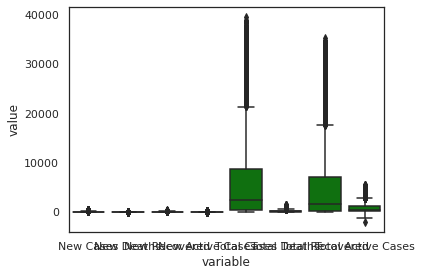

In [31]:
#Setelah memperkecil outlier
df1=data_clear.select_dtypes(include=['float64', 'int64','category'])

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))
plt.tight_layout()

## *Normalisasi Data*

In [32]:
data_clear.dtypes

Date                  int16
New Cases             int64
New Deaths            int64
New Recovered         int64
New Active Cases      int64
Total Cases           int64
Total Deaths          int64
Total Recovered       int64
Total Active Cases    int64
Province               int8
dtype: object

In [33]:
#Normalisasi data dengan MinMaxScaler
scaler = MinMaxScaler()
data_norm = pd.DataFrame(scaler.fit_transform(data_clear), columns=data_clear.columns)

data_norm

,Date,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Province
0,0.000000,0.029316,0.3,0.003817,0.451613,0.000202,0.003715,0.000284,0.277044,0.28125
1,0.001825,0.000000,0.1,0.087786,0.264516,0.000202,0.004458,0.000939,0.273843,0.28125
2,0.003650,0.000000,0.1,0.053435,0.322581,0.000202,0.005201,0.001337,0.271842,0.28125
3,0.005474,0.000000,0.3,0.030534,0.348387,0.000202,0.007429,0.001564,0.270375,0.28125
4,0.007299,0.000000,0.3,0.003817,0.393548,0.000202,0.009658,0.001593,0.269841,0.28125
...,...,...,...,...,...,...,...,...,...,...
11633,0.998175,0.895765,0.6,0.759542,0.870968,0.954144,0.911590,0.953779,0.670668,1.00000
11634,1.000000,0.328990,0.0,0.255725,0.638710,0.295331,0.144131,0.271070,0.537548,0.09375
11635,1.000000,0.605863,0.2,0.450382,0.845161,0.352626,0.210996,0.338254,0.512472,0.18750
11636,1.000000,0.026059,0.0,0.011450,0.451613,0.340757,0.369985,0.325909,0.479258,0.62500


In [34]:
y=data_norm['Total Cases']
X=data_norm.drop(columns=['Total Cases'])
#Mengubah data menjadi array
y=np.array(y)
X=np.array(X)

print(y)
print(X)

[2.02454764e-04 2.02454764e-04 2.02454764e-04 ... 3.52625585e-01
 3.40756675e-01 1.58167784e-01]
[[0.00000000e+00 2.93159609e-02 3.00000000e-01 ... 2.84438376e-04
  2.77044151e-01 2.81250000e-01]
 [1.82481752e-03 0.00000000e+00 1.00000000e-01 ... 9.38646642e-04
  2.73842870e-01 2.81250000e-01]
 [3.64963504e-03 0.00000000e+00 1.00000000e-01 ... 1.33686037e-03
  2.71842070e-01 2.81250000e-01]
 ...
 [1.00000000e+00 6.05863192e-01 2.00000000e-01 ... 3.38254117e-01
  5.12471655e-01 1.87500000e-01]
 [1.00000000e+00 2.60586319e-02 0.00000000e+00 ... 3.25909492e-01
  4.79258370e-01 6.25000000e-01]
 [1.00000000e+00 1.10749186e-01 0.00000000e+00 ... 1.59143272e-01
  3.48406029e-01 7.81250000e-01]]


# **Pemodelan KNN**

### Ide Dasar
Mengklasifikasikan sebuah data ke dalam sebuah kelas didasarkan pada tetangga terdekatnya

### Algoritma KNN
Klasifikasi dengan algoritma KNN dilakukan dengan langkah-langkah berikut:
1. Menghitung jarak antara data uji dan masing-masing data latih
2. Mengurutkan jarak dari terdekat hingga terjauh
3. Mengambil sejumlah k teratas dari vektor jarak(Tetangga)
4. Mengambil kelas yang paling sering muncul pada baris yang dipilih
5. Memilih kelas dari data prediksi

### Kelebihan
Fase pelatihan klasifikasi tetangga terdekat K jauh lebih cepat dibandingkan dengan algoritma klasifikasi lainnya. Tidak perlu melatih model untuk generalisasi, itulah sebabnya KNN dikenal sebagai algoritma pembelajaran sederhana dan berbasis instans. KNN dapat berguna dalam kasus data nonlinier. Ini bisa digunakan dengan masalah regresi. Nilai output untuk objek dihitung dengan rata-rata nilai k tetangga terdekat.

### Kekurangan
Fase pengujian klasifikasi K-terdekat tetangga lebih lambat dan lebih mahal dalam hal waktu dan memori. Ini membutuhkan memori yang besar untuk menyimpan seluruh set data pelatihan untuk prediksi. KNN memerlukan penskalaan data karena KNN menggunakan jarak Euclidean antara dua titik data untuk menemukan tetangga terdekat. Jarak euclidean sensitif terhadap magnitudo. Fitur dengan magnitudo tinggi akan lebih berbobot daripada fitur dengan magnitudo rendah. KNN juga tidak cocok untuk data berdimensi besar.

### Meningkatkan KNN
Untuk hasil yang lebih baik, sangat disarankan untuk menormalkan data pada skala yang sama. Umumnya, rentang normalisasi dianggap antara 0 dan 1. KNN tidak cocok untuk data berdimensi besar. Dalam kasus seperti itu, dimensi perlu dikurangi untuk meningkatkan kinerja. Selain itu, menangani nilai yang hilang akan membantu kami meningkatkan hasil.

Data untuk pelatihan dan pengujian Untuk memilih sekumpulan data pelatihan yang akan diinput dalam algoritma Machine Learning, untuk memastikan bahwa pelatihan algoritma klasifikasi dapat digeneralisasikan dengan baik ke data baru. Untuk penelitian ini menggunakan ukuran sampel 10% ( bertujuan untuk mengurangi efek overfitting).

## Memprediksi Kasus Kematian baru covid 19 dengan Model KNN

In [50]:
from sklearn.model_selection import train_test_split
y4 = data['New Deaths']
x4 = data.drop(columns=['New Deaths'])
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.1, random_state=9)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
# Mendefinisikan model
prediksi = KNeighborsClassifier(n_neighbors = 24)

# Menguji model
prediksi.fit(x4_train, y4_train)

# Memprediksi
y4_predict = prediksi.predict(x4_test)

x4_test

,Date,New Cases,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Province
1890,125,16,0,16,321,6,49,266,22
12369,433,0,9,-9,15216,498,12229,2489,29
1152,103,2,1,0,83,11,14,58,32
9699,355,21,40,-19,15102,575,13547,980,11
8772,328,19,18,0,1842,78,1449,315,3
...,...,...,...,...,...,...,...,...,...
14078,484,229,319,-95,40601,992,36340,3269,5
8289,313,100,37,61,6061,227,4959,875,29
2424,141,6,0,6,334,17,151,166,12
16189,546,8591,3719,4804,425208,5712,340461,79035,7


## Melihat tingkat akurasi prediksi

In [41]:
y = data['New Deaths']
x_data= data.drop(columns=['New Deaths'])

In [42]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [43]:
# Membagi data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=9)

In [44]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [45]:
knn = KNeighborsClassifier(n_neighbors = 7)  # menentukan nilai k 
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(7, knn.score(x_test.T, y_test.T)*100))

7 NN Score: 46.90%


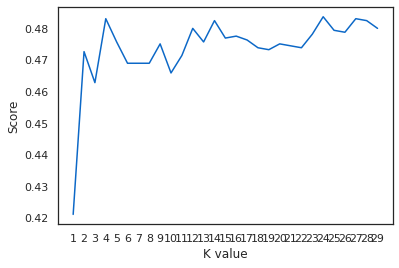

Maximum KNN Score is 48.37%


In [46]:
accuracies = {}
scoreList = []
for i in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # menentukan nilai k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,30), scoreList)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Skor maksimum KNN adalah {:.2f}%".format(acc))

dapat dilihat bahwa untuk k=24 adalah yang mempunyai akurasi terbaik yaitu 48,37%

## *Confusion Matrix*

In [47]:
confusion_matrix(y_test,prediction)

array([[665,  53,  17, ...,   0,   0,   0],
       [157,  41,  22, ...,   0,   0,   0],
       [ 63,  25,  22, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

## Memprediksi Kasus baru covid 19 dengan Model KNN

In [48]:
from sklearn.model_selection import train_test_split
y3 = data['New Cases']
x3 = data.drop(columns=['New Cases'])
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.1, random_state=9)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
# Mendefinisikan model
prediksi = KNeighborsClassifier(n_neighbors = 3)

# Menguji model
prediksi.fit(x3_train, y3_train)

# Memprediksi
y3_predict = prediksi.predict(x3_test)

x3_test

,Date,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Province
1890,125,0,0,16,321,6,49,266,22
12369,433,0,9,-9,15216,498,12229,2489,29
1152,103,1,1,0,83,11,14,58,32
9699,355,0,40,-19,15102,575,13547,980,11
8772,328,1,18,0,1842,78,1449,315,3
...,...,...,...,...,...,...,...,...,...
14078,484,5,319,-95,40601,992,36340,3269,5
8289,313,2,37,61,6061,227,4959,875,29
2424,141,0,0,6,334,17,151,166,12
16189,546,68,3719,4804,425208,5712,340461,79035,7


## Melihat tingkat akurasi prediksi

In [57]:
y1 = data['New Cases']
x1_data= data.drop(columns=['New Cases'])

In [58]:
x1 = (x1_data - np.min(x1_data)) / (np.max(x1_data) - np.min(x1_data)).values

In [59]:
# Membagi data menjadi data latih dan data uji
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size = 0.1,random_state=9)

In [61]:
x1_train = x1_train.T
y1_train = y1_train.T
x1_test = x1_test.T
y1_test = y1_test.T

In [62]:
knn = KNeighborsClassifier(n_neighbors = 7)  # menentukan nilai k
knn.fit(x1_train.T, y1_train.T)
prediction = knn.predict(x1_test.T)

print("{} NN Score: {:.2f}%".format(7, knn.score(x1_test.T, y1_test.T)*100))

7 NN Score: 11.23%


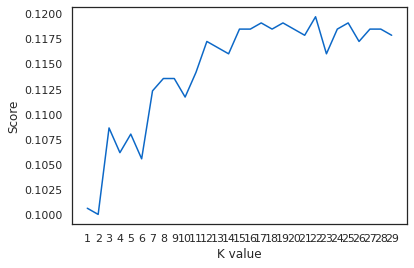

Maximum KNN Score is 11.97%


In [64]:
accuracies = {}
scoreList = []
for i in range(1,30):
    knn3 = KNeighborsClassifier(n_neighbors = i)  # menentukan nilai k
    knn3.fit(x1_train.T, y1_train.T)
    scoreList.append(knn3.score(x1_test.T, y1_test.T))
    
plt.plot(range(1,30), scoreList)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Skor maksimum KNN adalah {:.2f}%".format(acc))

dapat dilihat bahwa untuk k=22 adalah yang mempunyai akurasi terbaik yaitu 11,97%

## Confusion Matrix

In [65]:
confusion_matrix(y1_test,prediction)

array([[158,   9,   2, ...,   0,   0,   0],
       [ 49,   8,   6, ...,   0,   0,   0],
       [ 22,   7,   1, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   1,   0,   0]])

## Hasil Prediksi

In [66]:
#Membuat Dataframe hasil prediksi
submission = pd.DataFrame({'New Cases':y3_predict,'New Deaths':y4_predict})
                      
#Menampilkan data
submission.head(100)

,New Cases,New Deaths
0,3,0
1,4,0
2,0,0
3,45,2
4,2,0
...,...,...
95,6,0
96,343,7
97,0,0
98,49,0
